ECTImage

In [1]:
import numba as nb
import My_ECT as detect
import os
import numpy as np
import math

#Create a simp_comp input using data
def create_simp_comp(data):
    simp_comp = []
    data = np.array(data)
    for i in range(len(data)):
        simp_comp.append([i])  # Add the current point as a vertex
        if i < len(data) - 1:  # Check if it is not the last point
            simp_comp.append([i, i + 1])  # Add an edge to the next point
        else:
            simp_comp.append([i, 0])  # For the last point, add an edge to the first point
    return simp_comp


# Function to read coordinates from a file
def read_coordinates(file_path):
    with open(file_path, 'r') as file:
        # Read in all lines and split each line into a tuple of (x, y)
        coordinates = [tuple(map(float, line.strip().split())) for line in file]
    return coordinates

def calculate_norm(coord):
    x, y= coord
    return math.sqrt(x**2 + y**2)

def rotate_coordinates(coords, angle_deg):
    """Rotate coordinates by a given angle in degrees."""
    angle_rad = math.radians(angle_deg)
    cos_angle, sin_angle = math.cos(angle_rad), math.sin(angle_rad)
    return [(cos_angle * x - sin_angle * y, sin_angle * x + cos_angle * y) for x, y in coords]

def reflect_coordinates(coords):
    """Reflect coordinates horizontally."""
    return [(-x, y) for x, y in coords]

import os

organoids_data = {}
organoids_files = {}
global_largest_norm_d0 = 0  # Variable to store the global largest norm

# List of folders to process
folders = [
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball1",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball2",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball3",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball4",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball5",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette1",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette2",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette3",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette4",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette5",
]

# First pass: Find the global largest norm for 'd2'
for folder_path in folders:
    files = os.listdir(folder_path)
    for file_name in files:
        if file_name.endswith('.txt'):
            parts = file_name[:-4].split('_')
            if parts[0].startswith('d') and parts[0] == 'd0':
                coordinates = read_coordinates(os.path.join(folder_path, file_name))
                mean_x = sum(coord[0] for coord in coordinates) / len(coordinates)
                mean_y = sum(coord[1] for coord in coordinates) / len(coordinates)
                centered_coordinates = [(x - mean_x, y - mean_y) for x, y in coordinates]
                largest_norm_d0 = max(calculate_norm(coord) for coord in centered_coordinates)
                global_largest_norm_d0 = max(global_largest_norm_d0, largest_norm_d0)

for folder_path in folders:
    folder_name = os.path.basename(folder_path)

    if folder_name not in organoids_files:
        organoids_files[folder_name] = {}
    if folder_name not in organoids_data:
        organoids_data[folder_name] = {}

    files = os.listdir(folder_path)

    for file_name in files:
        if file_name.endswith('.txt'):
            parts = file_name[:-4].split('_')
            if parts[0].startswith('d'):
                day = parts[0]

                if day not in organoids_files[folder_name]:
                    organoids_files[folder_name][day] = []

                organoids_files[folder_name][day].append(file_name)

    for day in organoids_files[folder_name]:
            temp_recentered_coords = {}

            for file_name in organoids_files[folder_name][day]:
                coordinates = read_coordinates(os.path.join(folder_path, file_name))
                mean_x = sum(coord[0] for coord in coordinates) / len(coordinates)
                mean_y = sum(coord[1] for coord in coordinates) / len(coordinates)
                centered_coordinates = [(x - mean_x, y - mean_y) for x, y in coordinates]
                temp_recentered_coords[day] = centered_coordinates

            for day, centered_coordinates in temp_recentered_coords.items():
                normalized_coordinates = [(x / global_largest_norm_d0, y / global_largest_norm_d0) for x, y in centered_coordinates]

                
                organoids_data[folder_name][day] = normalized_coordinates

result = []
organoid_mapping = []
for folder_name in organoids_data:
    if 'Ball' in folder_name:
        organoid_mapping.append(('Ball',folder_name[0]+folder_name[-1]))
    elif 'Rosette' in folder_name:
        organoid_mapping.append(('Bubbly',folder_name[0]+folder_name[-1]))
    curve = []
    sorted_days = sorted(organoids_data[folder_name], key=lambda x: int(x[1:]))
    for day in sorted_days:
        coordinates = np.array(organoids_data[folder_name][day])
        simp_comp = create_simp_comp(coordinates)
        ectimage = detect.EctImg(simp_comp, coordinates, k=5000, xinterval = (-5., 5), xpoints = 100, yinterval = (0., 6.), ypoints = 6, factor = 10)
        ectimage_result = ectimage.compute(simp_comp, coordinates, k=5000, xinterval = (-5., 5), xpoints = 100, yinterval = (0., 6.), ypoints = 6, factor = 10)
        curve.append(ectimage_result.flatten())

    result.append(curve)

result = np.array(result)
data_for_tsne = result.reshape(result.shape[0], -1)

ECT

In [4]:
import numba as nb
import My_ECT as detect
import os
import numpy as np
import math

#Create a simp_comp input using data
def create_simp_comp(data):
    simp_comp = []
    data = np.array(data)
    for i in range(len(data)):
        simp_comp.append([i])  # Add the current point as a vertex
        if i < len(data) - 1:  # Check if it is not the last point
            simp_comp.append([i, i + 1])  # Add an edge to the next point
        else:
            simp_comp.append([i, 0])  # For the last point, add an edge to the first point
    return simp_comp


# Function to read coordinates from a file
def read_coordinates(file_path):
    with open(file_path, 'r') as file:
        # Read in all lines and split each line into a tuple of (x, y)
        coordinates = [tuple(map(float, line.strip().split())) for line in file]
    return coordinates

def calculate_norm(coord):
    x, y= coord
    return math.sqrt(x**2 + y**2)

def rotate_coordinates(coords, angle_deg):
    """Rotate coordinates by a given angle in degrees."""
    angle_rad = math.radians(angle_deg)
    cos_angle, sin_angle = math.cos(angle_rad), math.sin(angle_rad)
    return [(cos_angle * x - sin_angle * y, sin_angle * x + cos_angle * y) for x, y in coords]

def reflect_coordinates(coords):
    """Reflect coordinates horizontally."""
    return [(-x, y) for x, y in coords]

import os

organoids_data = {}
organoids_files = {}
global_largest_norm_d0 = 0  # Variable to store the global largest norm

# List of folders to process
folders = [
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball1",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball2",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball3",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball4",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Ball\\Ball5",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette1",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette2",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette3",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette4",
    "C:\\Users\\benja\\Desktop\\PhD\\Armin data\\BR_xy_coordinates\\Rosette\\Rosette5",
]

# First pass: Find the global largest norm for 'd2'
for folder_path in folders:
    files = os.listdir(folder_path)
    for file_name in files:
        if file_name.endswith('.txt'):
            parts = file_name[:-4].split('_')
            if parts[0].startswith('d') and parts[0] == 'd0':
                coordinates = read_coordinates(os.path.join(folder_path, file_name))
                mean_x = sum(coord[0] for coord in coordinates) / len(coordinates)
                mean_y = sum(coord[1] for coord in coordinates) / len(coordinates)
                centered_coordinates = [(x - mean_x, y - mean_y) for x, y in coordinates]
                largest_norm_d0 = max(calculate_norm(coord) for coord in centered_coordinates)
                global_largest_norm_d0 = max(global_largest_norm_d0, largest_norm_d0)

for folder_path in folders:
    folder_name = os.path.basename(folder_path)

    if folder_name not in organoids_files:
        organoids_files[folder_name] = {}
    if folder_name not in organoids_data:
        organoids_data[folder_name] = {}

    files = os.listdir(folder_path)

    for file_name in files:
        if file_name.endswith('.txt'):
            parts = file_name[:-4].split('_')
            if parts[0].startswith('d'):
                day = parts[0]

                if day not in organoids_files[folder_name]:
                    organoids_files[folder_name][day] = []

                organoids_files[folder_name][day].append(file_name)

    for day in organoids_files[folder_name]:
            temp_recentered_coords = {}

            for file_name in organoids_files[folder_name][day]:
                coordinates = read_coordinates(os.path.join(folder_path, file_name))
                mean_x = sum(coord[0] for coord in coordinates) / len(coordinates)
                mean_y = sum(coord[1] for coord in coordinates) / len(coordinates)
                centered_coordinates = [(x - mean_x, y - mean_y) for x, y in coordinates]
                temp_recentered_coords[day] = centered_coordinates

            for day, centered_coordinates in temp_recentered_coords.items():
                normalized_coordinates = [(x / global_largest_norm_d0, y / global_largest_norm_d0) for x, y in centered_coordinates]

                
                organoids_data[folder_name][day] = normalized_coordinates

result = []
organoid_mapping = []
for folder_name in organoids_data:
    if 'Ball' in folder_name:
        organoid_mapping.append(('Ball',folder_name[0]+folder_name[-1]))
    elif 'Rosette' in folder_name:
        organoid_mapping.append(('Bubbly',folder_name[0]+folder_name[-1]))
    curve = []
    sorted_days = sorted(organoids_data[folder_name], key=lambda x: int(x[1:]))
    for day in sorted_days:
        coordinates = np.array(organoids_data[folder_name][day])
        simp_comp = create_simp_comp(coordinates)
        sect_result = detect.ect_2d(simp_comp, coordinates, k=480, interval=(-5., 5.), points=5000)
        curve.append(sect_result)

    result.append(curve)

result = np.array(result)
data_for_tsne = result.reshape(result.shape[0], -1)

Synthetic shapes


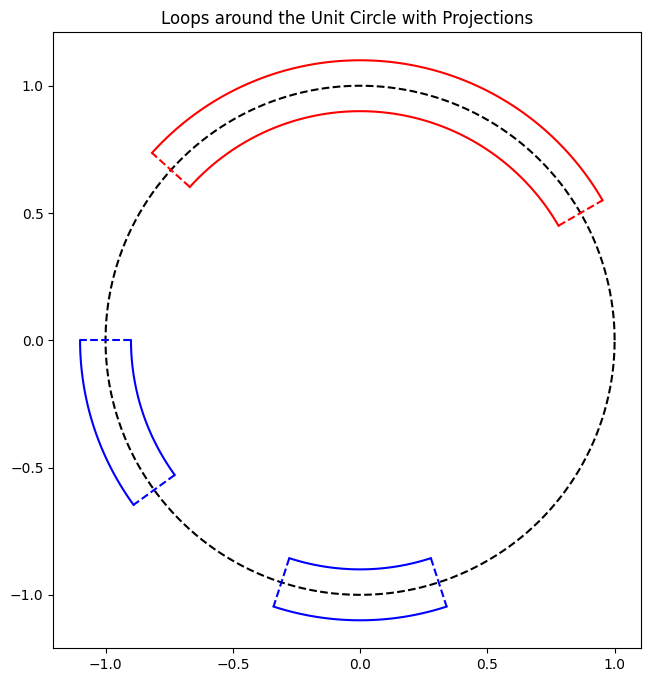

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def generate_arc_points(center, radius, start_angle, end_angle, num_points):
    angles = np.linspace(start_angle, end_angle, num_points)
    x = center[0] + radius * np.cos(angles)
    y = center[1] + radius * np.sin(angles)
    return np.vstack((x, y)).T

def plot_arcs_with_projections(arcs, proj_radius1, proj_radius2, color, num_points):
    for arc in arcs:
        main_center, main_radius, start_angle, end_angle = arc
        
        # Generate projected arcs
        proj_arc1_points = generate_arc_points(main_center, proj_radius1, start_angle, end_angle, num_points)
        proj_arc2_points = generate_arc_points(main_center, proj_radius2, start_angle, end_angle, num_points)
        
        # Define the connecting edges
        start_proj1 = proj_arc1_points[0]
        end_proj1 = proj_arc1_points[-1]
        start_proj2 = proj_arc2_points[0]
        end_proj2 = proj_arc2_points[-1]
        
        # Only include the edges that connect start_proj1 to start_proj2 and end_proj1 to end_proj2
        connecting_edges = np.array([
            start_proj1,
            start_proj2,
            end_proj2,
            end_proj1,
            start_proj1  # Closing the loop
        ])
        
        # Plot the projected arcs and connecting edges
        plt.plot(proj_arc1_points[:, 0], proj_arc1_points[:, 1], color=color)
        plt.plot(proj_arc2_points[:, 0], proj_arc2_points[:, 1], color=color)
        plt.plot([start_proj1[0], start_proj2[0]], [start_proj1[1], start_proj2[1]], color=color, linestyle='--')
        plt.plot([end_proj1[0], end_proj2[0]], [end_proj1[1], end_proj2[1]], color=color, linestyle='--')
        
        yield proj_arc1_points, proj_arc2_points, connecting_edges

# Number of points per arc
num_points = 100

# Define the unit circle
unit_circle_center = (0, 0)
unit_circle_radius = 1

# Define the red arcs
red_arc_length = 3*np.pi / 5  # Example arc length (60 degrees)
red_arcs = [
    (unit_circle_center, unit_circle_radius, np.pi/6, np.pi/6 + red_arc_length),
    # (unit_circle_center, unit_circle_radius, np.pi, np.pi + red_arc_length)
]

# Define the blue arcs
blue_arc_length = red_arc_length / 3  # Each blue arc is half the length of a red arc
separation_angle = np.pi / 5  # Small separation angle
blue_arcs = [
    (unit_circle_center, unit_circle_radius, np.pi, np.pi + blue_arc_length),
    (unit_circle_center, unit_circle_radius, np.pi + blue_arc_length + separation_angle, np.pi + 2*blue_arc_length + separation_angle)
]

plt.figure(figsize=(8, 8))

# Plot the unit circle
theta = np.linspace(0, 2 * np.pi, 200)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y, 'k--')

# Define radii for projections
proj_radius1 = 0.9
proj_radius2 = 1.1

# Store points for red arcs
red_points = []
for proj_arc1_points, proj_arc2_points, connecting_edges in plot_arcs_with_projections(red_arcs, proj_radius1, proj_radius2, 'red', num_points):
    red_points.append((proj_arc1_points, proj_arc2_points, connecting_edges))

# Store points for blue arcs
blue_points = []
for proj_arc1_points, proj_arc2_points, connecting_edges in plot_arcs_with_projections(blue_arcs, proj_radius1, proj_radius2, 'blue', num_points):
    blue_points.append((proj_arc1_points, proj_arc2_points, connecting_edges))

plt.gca().set_aspect('equal', adjustable='box')
plt.title("Loops around the Unit Circle with Projections")
plt.show()

# Store points as shape representation
shape_representation = {
    'red_arcs': red_points,
    'blue_arcs': blue_points
}

# Access the generated points
red_points = shape_representation['red_arcs']
blue_points = shape_representation['blue_arcs']

# # Print points for verification
# print("Red arcs points:")
# for proj_arc1, proj_arc2, edges in red_points:
#     print("Projection 1 points:", proj_arc1)
#     print("Projection 2 points:", proj_arc2)
#     print("Connecting edges:", edges)
#     print()

# print("\nBlue arcs points:")
# for proj_arc1, proj_arc2, edges in blue_points:
#     print("Projection 1 points:", proj_arc1)
#     print("Projection 2 points:", proj_arc2)
#     print("Connecting edges:", edges)
#     print()


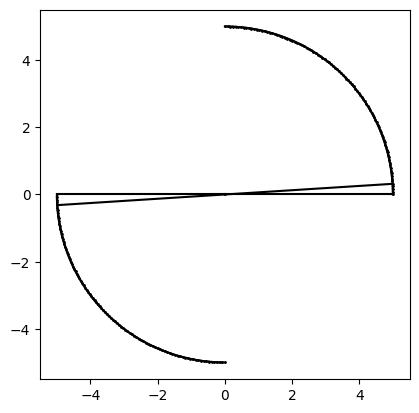

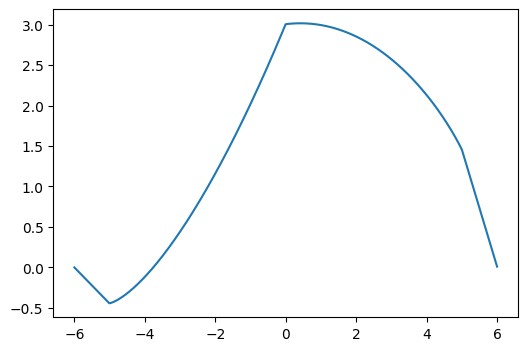

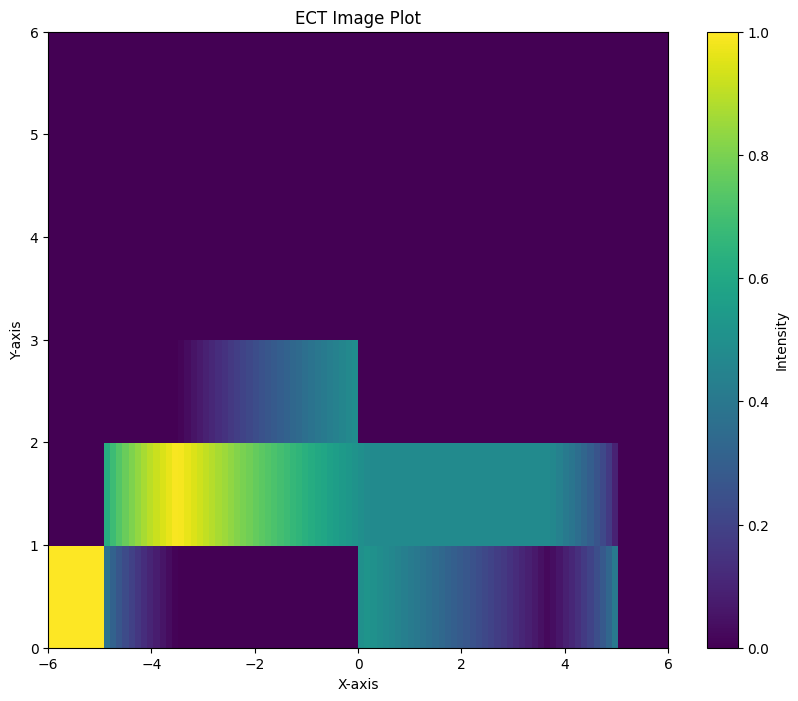

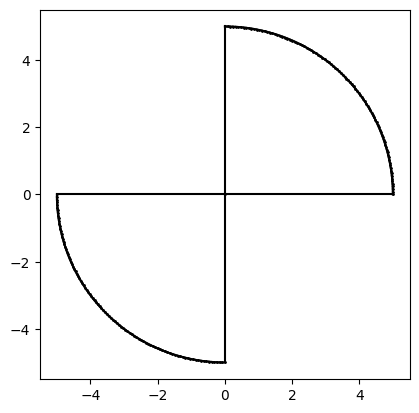

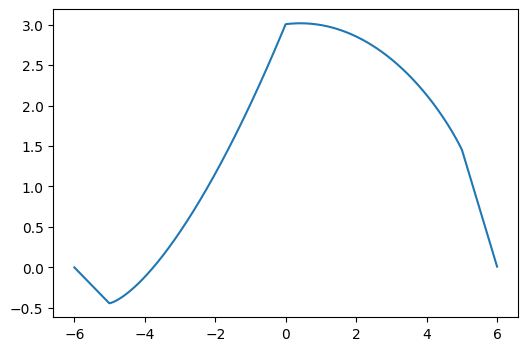

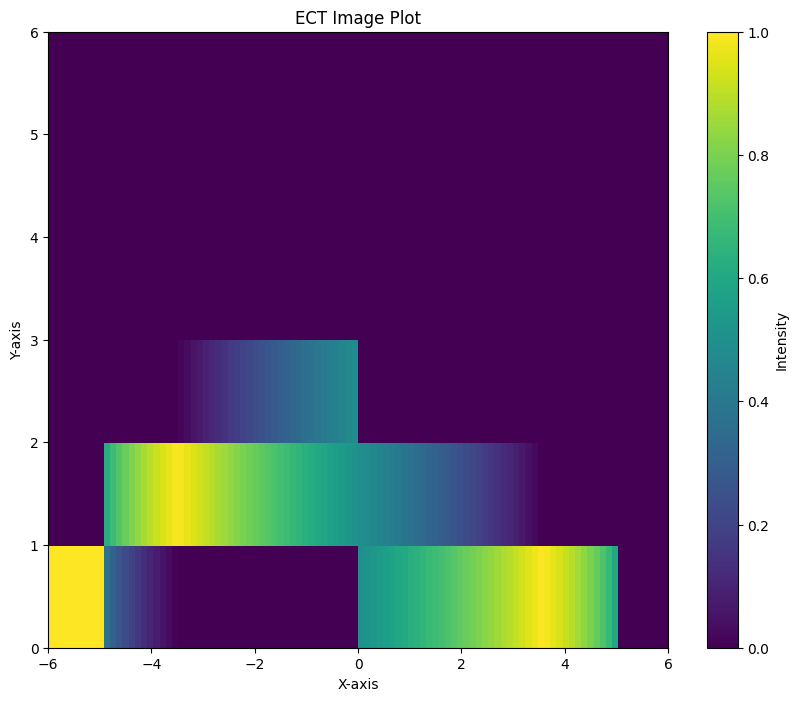

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import My_ECT as detect

def generate_arc_points(center, radius, start_angle, end_angle, num_points, noise_std=0.01):
    angles = np.linspace(start_angle, end_angle, num_points)
    noisy_radii = radius + np.random.normal(0, noise_std * radius, num_points)
    x = center[0] + noisy_radii * np.cos(angles)
    y = center[1] + noisy_radii * np.sin(angles)
    return np.vstack((x, y)).T



def create_simp_comp( start_angle1, radius: int = 5, num_points: int = 100, rotation: int = 100):
    center = [0, 0]
    end_angle1 = start_angle1 + np.pi/2
    arc1 = generate_arc_points(center, radius, start_angle1, end_angle1, num_points)
    arc2 = generate_arc_points(center, radius, start_angle1+np.pi, end_angle1+np.pi, num_points)
    data = np.vstack((center,arc1, arc2))
    simp_comp = []
    for i in range(len(data)):
        simp_comp.append([i]) 
        if 0 < i < len(arc1): 
            simp_comp.append([i, i + 1]) 
        elif  len(arc1) < i < len(arc1) + len(arc2):
            simp_comp.append([i, i + 1])
    simp_comp.append([0, 1])
    simp_comp.append([0, rotation])
    simp_comp.append([0, num_points + 1])
    simp_comp.append([0, num_points + rotation])
    return data, simp_comp


radius = 5
start_angle1 = 0
num_points = 100
rotation = 5

# Generate points and simplicial complex
points, simp_comp = create_simp_comp( start_angle1, radius, num_points, rotation)

# Plotting the simplicial complex
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1], color='black',s=1)

for simplex in simp_comp:
    simplex_points = points[simplex, :]
    if len(simplex) == 1:
        # ax.plot(simplex_points[:, 0], simplex_points[:, 1], 'bo')
        pass
    else:
        ax.plot(simplex_points[:, 0], simplex_points[:, 1], 'k-')

ax.set_aspect('equal')
plt.show()

detect_curve = detect.sect_2d(simp_comp, points, k=5000, interval=(-6., 6.), points=1000, mode='mean')
x_values = np.linspace(-6, 6, 1000)
plt.figure(figsize=(6, 4))
plt.plot(x_values, detect_curve, label=f'DETECT')
plt.show()
ect_image = detect.EctImg(simp_comp, points, k=5000, xinterval = (-6., 6), xpoints = 100, yinterval = (0., 6), ypoints = 6, factor = 10)
ect_image.plot()

radius = 5
start_angle1 = 0
num_points = 100
rotation = 100

# Generate points and simplicial complex
points, simp_comp = create_simp_comp(start_angle1, radius, num_points, rotation)

# Plotting the simplicial complex
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1], color='black',s=1)

for simplex in simp_comp:
    simplex_points = points[simplex, :]
    if len(simplex) == 1:
        # ax.plot(simplex_points[:, 0], simplex_points[:, 1], 'bo')
        pass
    else:
        ax.plot(simplex_points[:, 0], simplex_points[:, 1], 'k-')

ax.set_aspect('equal')
plt.show()

detect_curve = detect.sect_2d(simp_comp, points, k=5000, interval=(-6., 6.), points=1000, mode='mean')
x_values = np.linspace(-6, 6, 1000)
plt.figure(figsize=(6, 4))
plt.plot(x_values, detect_curve, label=f'DETECT')
plt.show()
ect_image = detect.EctImg(simp_comp, points, k=5000, xinterval = (-6., 6), xpoints = 100, yinterval = (0., 6), ypoints = 6, factor = 10)
ect_image.plot()

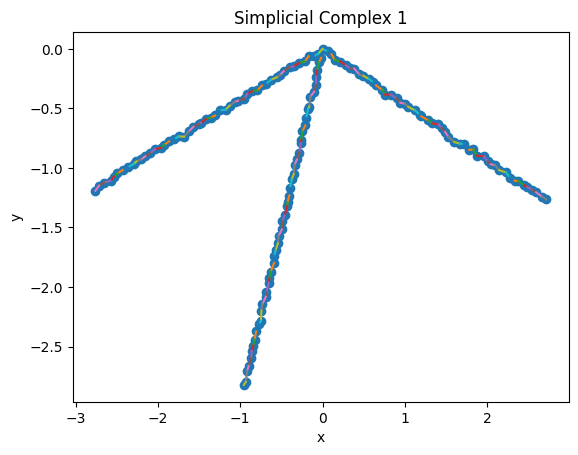

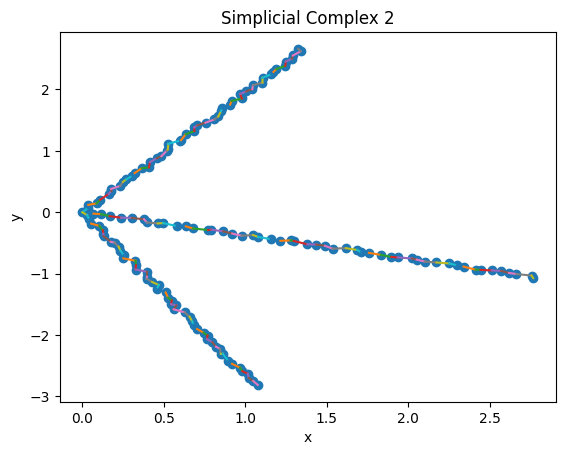

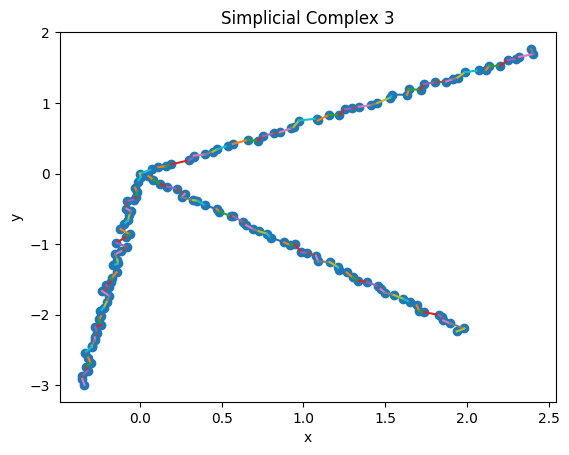

In [9]:
import numpy as np
import math

def rotate_points_about_origin(points, angle):
    """
    Rotate all points in 'points' by 'angle' radians about the origin (0,0).
    This rotation is done in-place and also returned.
    """
    cos_a = math.cos(angle)
    sin_a = math.sin(angle)
    for i in range(len(points)):
        x, y = points[i]
        x_new = cos_a * x - sin_a * y
        y_new = sin_a * x + cos_a * y
        points[i][0] = x_new
        points[i][1] = y_new
    return points

def generate_noisy_three_edges_shared_origin_with_rotation(n, k, noise_std=0.01, seed=None):
    if seed is not None:
        np.random.seed(seed)

    # Generate 3 random angles for the edges
    edge_angles = np.random.uniform(0, 2*math.pi, size=3)

    # Build base points
    base_points = []
    # origin
    base_points.append([0.0, 0.0])

    # Each edge: n-1 new points
    for theta in edge_angles:
        for j in range(1, n):
            t = 3.0 * j / (n - 1)
            x = t * math.cos(theta)
            y = t * math.sin(theta)
            base_points.append([x, y])
    
    base_points = np.array(base_points)

    num_vertices = 1 + 3*(n-1)

    # Build simplices
    simplices_template = []
    for i in range(num_vertices):
        simplices_template.append([i])  # 0-simplex
    
    for edge_i in range(3):
        start = 1 + edge_i*(n-1)
        # connect origin -> start
        simplices_template.append([0, start])
        # then consecutive points
        for v in range(start, start + (n-2)):
            simplices_template.append([v, v+1])

    current_points = base_points.copy()
    results = []
    for _ in range(k):
        angle = np.random.uniform(0, 2*math.pi)
        rotate_points_about_origin(current_points, angle)
        # Add noise except for origin
        noise = np.random.normal(0.0, noise_std, current_points.shape)
        noise[0,:] = 0.0
        current_points += noise

        points_copy = current_points.copy()
        simplices_copy = [s[:] for s in simplices_template]
        results.append((points_copy, simplices_copy))

    return results



import matplotlib.pyplot as plt

def plot_simplicial_complexes(results):
    """
    Plots each simplicial complex in the results list on its own figure.

    :param results: A list of (points, simplices) tuples, where
        points   is an array of shape (num_vertices, 2), and
        simplices is a list of lists of indices representing 0- and 1-simplices.
    """
    for i, (pts, simplices) in enumerate(results):
        # Create a new figure for each simplicial complex
        plt.figure()

        # Plot the 0-simplices (vertices)
        plt.scatter(pts[:, 0], pts[:, 1])  # default marker/color

        # Plot the 1-simplices (edges)
        for simplex in simplices:
            if len(simplex) == 2:  # an edge of the form [i, j]
                x1, y1 = pts[simplex[0]]
                x2, y2 = pts[simplex[1]]
                plt.plot([x1, x2], [y1, y2])  # default style/color

        # Labeling
        plt.title(f"Simplicial Complex {i+1}")
        plt.xlabel("x")
        plt.ylabel("y")

        # In many environments, plt.show() will display the figure immediately;
        # if you're in a notebook environment, you can omit it or keep it.
        plt.show()

results = generate_noisy_three_edges_shared_origin_with_rotation(n=50, k=3, noise_std=0.01)
plot_simplicial_complexes(results)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import My_ECT as detect

def generate_arc_points(center, radius, start_angle, end_angle, num_points, noise_std=0.01):
    angles = np.linspace(start_angle, end_angle, num_points)
    noisy_radii = radius + np.random.normal(0, noise_std * radius, num_points)
    x = center[0] + noisy_radii * np.cos(angles)
    y = center[1] + noisy_radii * np.sin(angles)
    return np.vstack((x, y)).T



def create_simp_comp( start_angle1, radius: int = 5, num_points: int = 100, rotation: int = 100):
    center = [0, 0]
    end_angle1 = start_angle1 + np.pi/2
    arc1 = generate_arc_points(center, radius, start_angle1, end_angle1, num_points)
    arc2 = generate_arc_points(center, radius, start_angle1+np.pi, end_angle1+np.pi, num_points)
    data = np.vstack((center,arc1, arc2))
    simp_comp = []
    for i in range(len(data)):
        simp_comp.append([i]) 
        if 0 < i < len(arc1): 
            simp_comp.append([i, i + 1]) 
        elif  len(arc1) < i < len(arc1) + len(arc2):
            simp_comp.append([i, i + 1])
    simp_comp.append([0, 1])
    simp_comp.append([0, rotation])
    simp_comp.append([0, num_points + 1])
    simp_comp.append([0, num_points + rotation])
    return data, simp_comp


def plot_shapes(shapes, title):
    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)
    for i, (points, simp_comp) in enumerate(shapes):
        ax = axs[i // 5, i % 5]
        ax.scatter(points[:, 0], points[:, 1], color='black', s=1)
        for simplex in simp_comp:
            simplex_points = points[simplex, :]
            if len(simplex) == 1:
                pass
            else:
                ax.plot(simplex_points[:, 0], simplex_points[:, 1], 'k-')
        ax.set_aspect('equal')
    plt.show()

shapes_class1 = [create_simp_comp(np.random.uniform(0, 2 * np.pi), radius=5, num_points=100, rotation=5) for _ in range(50)]
shapes_class2 = [create_simp_comp(np.random.uniform(0, 2 * np.pi), radius=5, num_points=100, rotation=100) for _ in range(50)]

# Plot the shapes
# plot_shapes(shapes_class1, "Shapes Class 1: radius=5, num_points=100, rotation=5")
# plot_shapes(shapes_class2, "Shapes Class 2: radius=5, num_points=100, rotation=100")

all_shapes = shapes_class1 + shapes_class2
detect_result = []
image_result = []
ect_result = []
random_result = []
# Example detection curves and images (for the first shape in each class)
for points, simp_comp in all_shapes:
    ect_curve = detect.ect_2d(simp_comp, points, k=1000, interval=(-2., 2.), points=1000)
    detect_curve = detect.sect_2d(simp_comp, points, k=1000, interval=(-2., 2.), points=1000, mode='mean')
    ect_image = detect.EctImg(simp_comp, points, k=1000, xinterval=(-2., 2), xpoints=1000, yinterval=(0., 6), ypoints=6, factor=10)
    random_ect = detect.RandomEct_2d(simp_comp, points, k=1000, interval=(-2., 2.), points=1000)
    ectimage_result = ect_image.compute(simp_comp, points, k=1000, xinterval=(-2., 2), xpoints=100, yinterval=(0., 6), ypoints=6, factor=10 )
    ect_curve = np.array(ect_curve)
    ect_result.append(ect_curve.flatten())
    detect_result.append(detect_curve)
    image_result.append(ectimage_result.flatten())
    random_ect = np.array(random_ect)
    random_result.append(random_ect.flatten())


ect_result = np.array(ect_result)
detect_result = np.array(detect_result)
image_result = np.array(image_result)
random_result = np.array(random_result)
ect_for_tsne = ect_result.reshape(ect_result.shape[0], -1)
DETECT_for_tsne = detect_result.reshape(detect_result.shape[0], -1)
image_for_tsne = image_result.reshape(image_result.shape[0], -1)
random_for_tsne = random_result.reshape(random_result.shape[0], -1)


: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Generate the t-SNE results for DETECT_for_tsne and image_for_tsne
tsne_ect = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_ect_result = tsne_ect.fit_transform(ect_for_tsne)

tsne_detect = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_detect_result = tsne_detect.fit_transform(DETECT_for_tsne)

tsne_image = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_image_result = tsne_image.fit_transform(image_for_tsne)
tsne_random = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_random_result = tsne_random.fit_transform(random_for_tsne)

# Create labels for the shape classes
labels = np.array([0] * 10 + [1] * 10)  # 0 for class 1, 1 for class 2

# Define a color map for the shape classes
colors = plt.cm.viridis(np.linspace(0, 1, 2))
class_color_map = {0: colors[0], 1: colors[1]}
class_labels = {0: 'Class 1', 1: 'Class 2'}

def plot_tsne(tsne_result, title):
    plt.figure(figsize=(5, 5))
    font_properties = {'family': 'Times New Roman', 'size': 12}

    for class_label, color in class_color_map.items():
        indices = np.where(labels == class_label)[0]
        x, y = tsne_result[indices].T
        plt.scatter(x, y, label=class_labels[class_label], color=color, marker='o')

    plt.xlabel('t-SNE Dimension 1', fontdict=font_properties)
    plt.ylabel('t-SNE Dimension 2', fontdict=font_properties)
    plt.title(title, fontdict=font_properties)
    plt.legend(loc='best', prop=font_properties)
    plt.show()

plot_tsne(tsne_ect_result, '2D t-SNE Plot for ECT Features')

plot_tsne(tsne_detect_result, '2D t-SNE Plot for DETECT Features')

plot_tsne(tsne_image_result, '2D t-SNE Plot for Image Features')
plot_tsne(tsne_random_result, '2D t-SNE Plot for Random ECT Features')


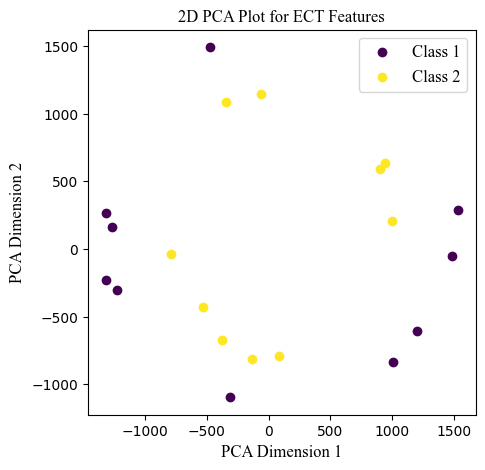

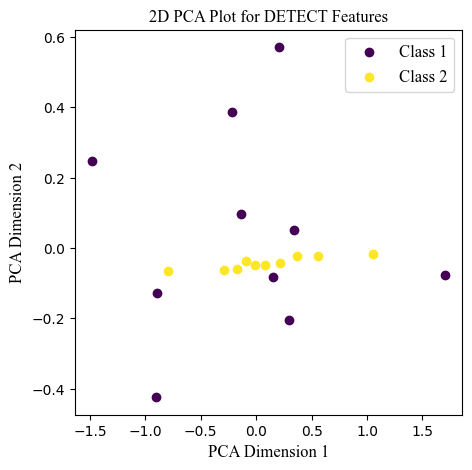

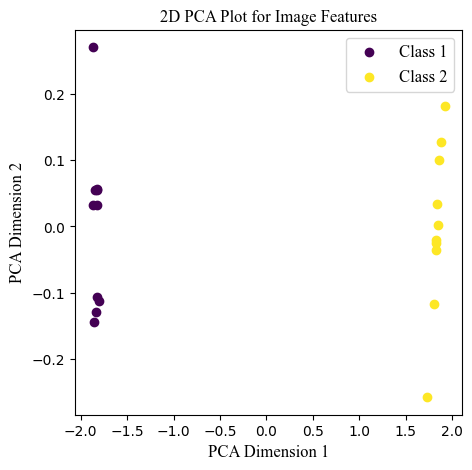

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca_ect = PCA(n_components=2)
pca_ect_result = pca_ect.fit_transform(ect_for_tsne)

# Generate the PCA results for DETECT_for_tsne and image_for_tsne
pca_detect = PCA(n_components=2)
pca_detect_result = pca_detect.fit_transform(DETECT_for_tsne)

pca_image = PCA(n_components=2)
pca_image_result = pca_image.fit_transform(image_for_tsne)

# Create labels for the shape classes
labels = np.array([0] * 10 + [1] * 10)  # 0 for class 1, 1 for class 2

# Define a color map for the shape classes
colors = plt.cm.viridis(np.linspace(0, 1, 2))
class_color_map = {0: colors[0], 1: colors[1]}
class_labels = {0: 'Class 1', 1: 'Class 2'}

def plot_pca(pca_result, title):
    plt.figure(figsize=(5, 5))
    font_properties = {'family': 'Times New Roman', 'size': 12}

    for class_label, color in class_color_map.items():
        indices = np.where(labels == class_label)[0]
        x, y = pca_result[indices].T
        plt.scatter(x, y, label=class_labels[class_label], color=color, marker='o')

    plt.xlabel('PCA Dimension 1', fontdict=font_properties)
    plt.ylabel('PCA Dimension 2', fontdict=font_properties)
    plt.title(title, fontdict=font_properties)
    plt.legend(loc='best', prop=font_properties)
    plt.show()

# Plot the PCA results for DETECT_for_tsne
plot_pca(pca_ect_result, '2D PCA Plot for ECT Features')
plot_pca(pca_detect_result, '2D PCA Plot for DETECT Features')

# Plot the PCA results for image_for_tsne
plot_pca(pca_image_result, '2D PCA Plot for Image Features')


Visualization

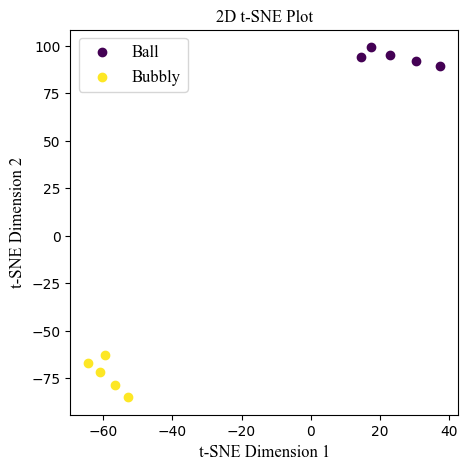

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Assuming 'data_for_tsne' and 'organoid_mapping' are predefined
tsne = TSNE(n_components=2, random_state=42, perplexity=2)
tsne_result = tsne.fit_transform(data_for_tsne)

folder_names = np.array(organoid_mapping)[:, 1]
shapes = np.array(organoid_mapping)[:, 0]
unique_shapes = np.unique(shapes)

# Generate a color map
colours = plt.cm.viridis(np.linspace(0, 1, len(unique_shapes)))
shape_color_map = dict(zip(unique_shapes, colours))

# Create a scatter plot
plt.figure(figsize=(5,5))

# Define font properties
font_properties = {'family' : 'Times New Roman', 'size' : 12}

# Plot each shape with a single legend entry
for shape, color in shape_color_map.items():
    # Change label "rosette" to "bubbly" and adjust marker if needed
    if shape == "rosette":
        shape_label = "bubbly"
        marker_style = 'o'  # Example marker style change for "bubbly"
    else:
        shape_label = shape
        marker_style = 'o'  # Default marker style for other shapes
        
    indices = np.where(shapes == shape)[0]
    selected_folder_names = folder_names[indices]
    x, y = tsne_result[indices].T
    plt.scatter(x, y, label=shape_label, color=color, marker=marker_style)
    # Optional: Add text labels to points with specified font
    # for i, (x, y) in enumerate(zip(x, y)):
    #     plt.text(x, y, selected_folder_names[i], fontdict=font_properties)

# Set labels and title with specified font
plt.xlabel('t-SNE Dimension 1', fontdict=font_properties)
plt.ylabel('t-SNE Dimension 2', fontdict=font_properties)
plt.title('2D t-SNE Plot', fontdict=font_properties)

# Create a legend with specified font
plt.legend(loc='best', prop=font_properties)

# Show the plot
plt.show()


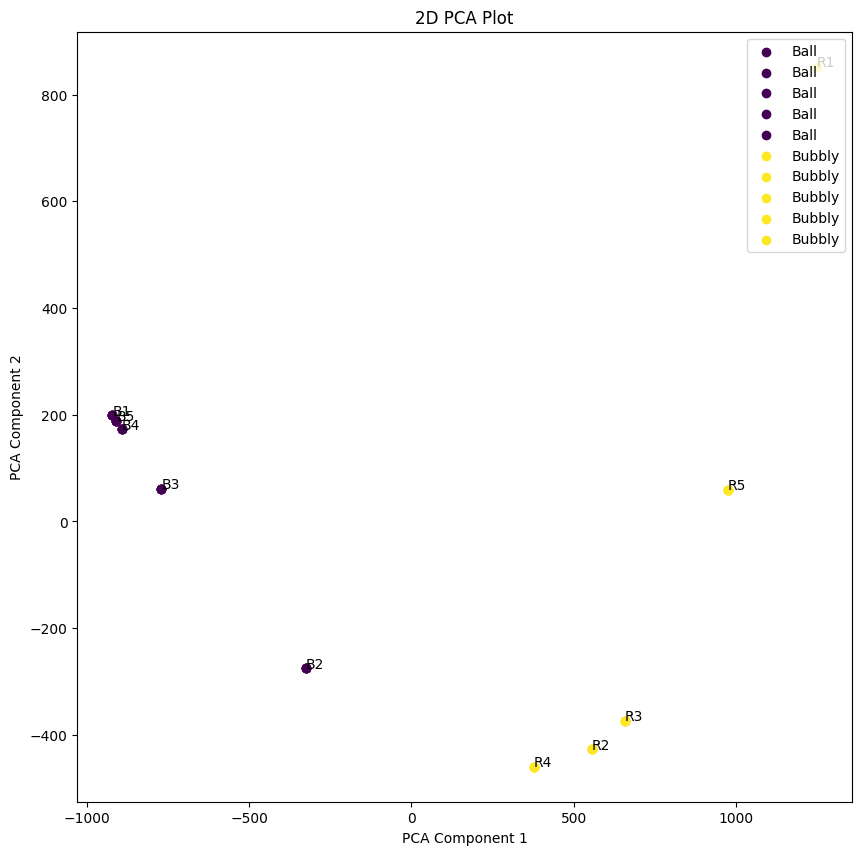

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np  # Assuming numpy is needed

# Perform PCA on the data
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(data_for_tsne)

# Assuming organoid_mapping is defined as before
folder_names = np.array(organoid_mapping)[:,1]
shapes = np.array(organoid_mapping)[:,0]
unique_shapes = np.unique(shapes)
colours = plt.cm.viridis(np.linspace(0, 1, len(unique_shapes)))
shape_color_map = dict(zip(unique_shapes, colours))

# Create a scatter plot
plt.figure(figsize=(10, 10))
for shape in unique_shapes:
    indices = np.where(shapes == shape)
    selected_folder_names = folder_names[indices]
    for i ,(x,y) in enumerate(pca_result[indices]):
        plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=shape, color=shape_color_map[shape])
        plt.text(x, y, selected_folder_names[i])

# Add labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Plot')
plt.legend(loc='upper right')

# Show the plot
plt.show()


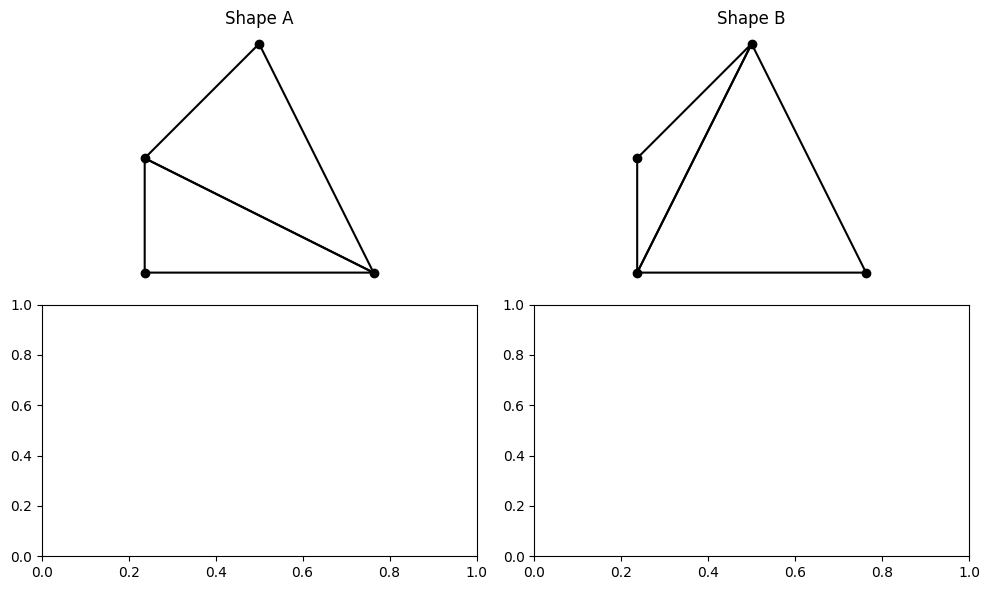

ECT image for Shape A


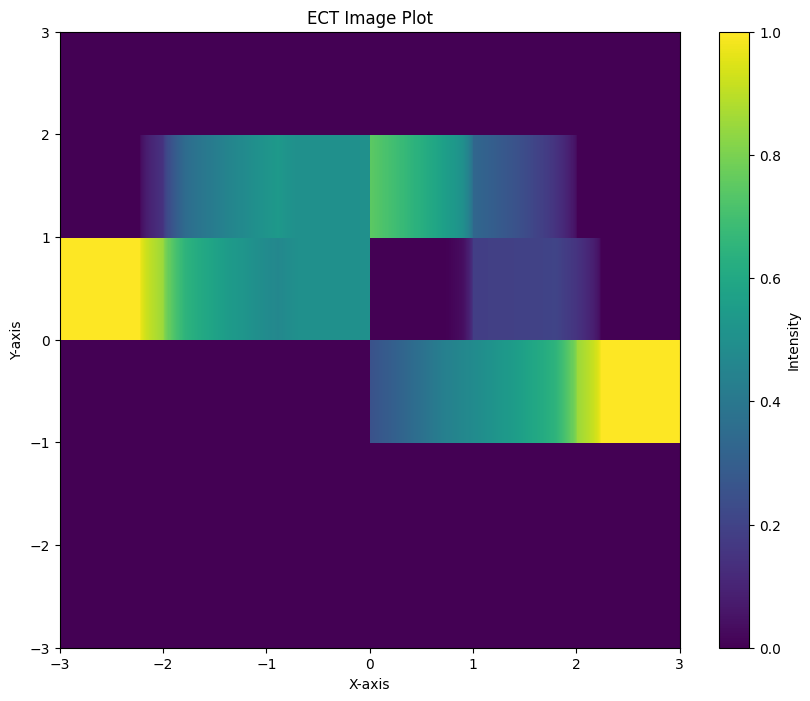

ECT image for Shape B


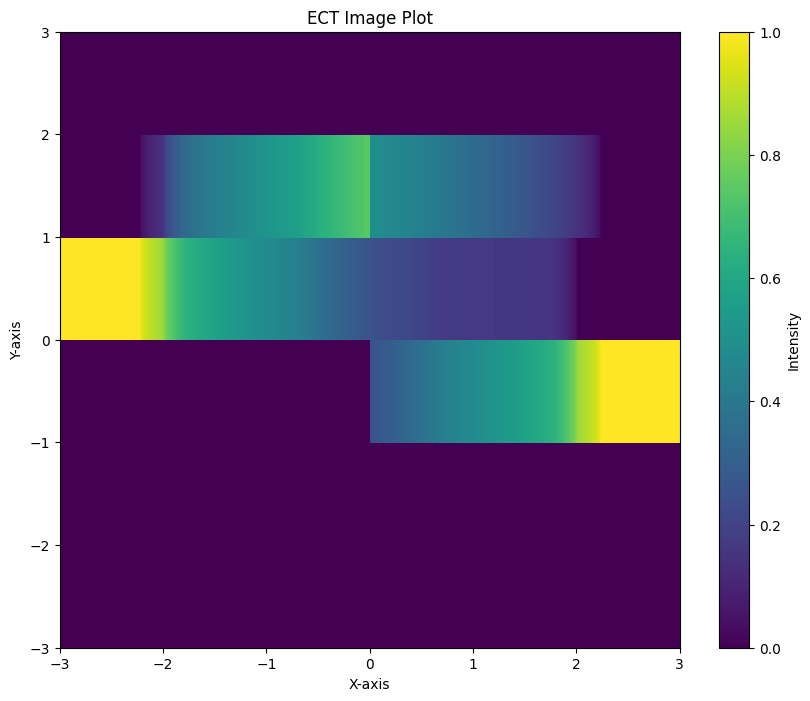

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import My_ECT as detect   # make sure your custom module is on the PYTHONPATH

# ------------------------------------------------------------------
# Helper: turn a face list into the "simp_comp" list expected by My_ECT
# ------------------------------------------------------------------
def build_simp_complex(vertices, faces):
    """
    vertices : (n,2) array of coordinates
    faces    : list of 3‑tuples with vertex indices (triangles)
    
    Returns
    -------
    simp_comp : list[list[int]]
        0‑simplices, 1‑simplices, and 2‑simplices
    """
    simplices = []

    # 0‑simplices
    for i in range(len(vertices)):
        simplices.append([i])

    # 1‑simplices  (all unique edges appearing in faces)
    edges = set()
    for (i, j, k) in faces:
        for a, b in [(i, j), (j, k), (i, k)]:
            edges.add(tuple(sorted((a, b))))
    for e in sorted(edges):
        simplices.append(list(e))


    return simplices


# ------------------------------------------------------------------
# Vertices (shared) and two different triangulations
# ------------------------------------------------------------------
verts = np.array([(0., 0.),    # 0
                  (2., 0.),    # 1
                  (0., 1.),    # 2
                  (1., 2.)])   # 3

faces_A = [(0, 1, 2), (1, 2, 3)]  # diagonal 1‑2
faces_B = [(0, 1, 3), (0, 2, 3)]  # diagonal 0‑3

simp_A = build_simp_complex(verts, faces_A)
simp_B = build_simp_complex(verts, faces_B)

# ------------------------------------------------------------------
# Parameters for ECT sampling / image
# ------------------------------------------------------------------
k_dirs    = 5000           # random directions
x_intv    = (-3., 3.)
x_points  = 600
y_intv    = (-3., 3.)       # χ takes values 0,1,2
y_points  = 6
factor    = 10             # blur‑factor used by My_ECT

# ------------------------------------------------------------------
# Compute & plot with detect.EctImg
# ------------------------------------------------------------------
img_A = detect.EctImg(simp_A, verts,
                      k=k_dirs,
                      xinterval=x_intv, xpoints=x_points,
                      yinterval=y_intv, ypoints=y_points,
                      factor=factor)

img_B = detect.EctImg(simp_B, verts,
                      k=k_dirs,
                      xinterval=x_intv, xpoints=x_points,
                      yinterval=y_intv, ypoints=y_points,
                      factor=factor)

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# --- draw the complexes
for ax, faces, title in zip(axes[0], [faces_A, faces_B], ["Shape A", "Shape B"]):
    for tri in faces:
        xs = np.append(verts[list(tri), 0], verts[tri[0], 0])
        ys = np.append(verts[list(tri), 1], verts[tri[0], 1])
        ax.plot(xs, ys, 'k-', lw=1.5)
    ax.scatter(verts[:, 0], verts[:, 1], c='k')
    ax.set_aspect('equal')
    ax.set_title(title)
    ax.axis('off')

# --- plot ECT images using detect's own `.plot()`
plt.tight_layout()
plt.show()

print("ECT image for Shape A")
img_A.plot()

print("ECT image for Shape B")
img_B.plot()
